In [2]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:/Program Files/QGIS 3.10/apps/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("C:/Program Files/QGIS 3.10/apps/qgis/lib", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage, QFont
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Prefix:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Plugin Path:		C:/PROGRA~1/QGIS3~1.10/apps/qgis/plugins
Package Data Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/Program Files/QGIS 3.10/apps/qgis/lib/./svg/
		C:/PROGRA~1/QGIS3~1.10/apps/qgis/./svg/
		C:/Users/migue/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/migue/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, HTML

In [4]:
import wget
os.remove("Data/cases_country.csv")
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
wget.download(url, 'Data/cases_country.csv')

100% [..............................................................................] 22154 / 22154

'Data/cases_country.csv'

In [5]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [5]:
#country_df.head()

In [6]:
# Colocar o nome das colunas em minusulas
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# mudar o nome de province/state para state e country/region para country

confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [7]:
print(" Confirmed: " + str(confirmed_total))
print(" Deaths: " + str(deaths_total))
print(" Recovered: " + str(recovered_total))

 Confirmed: 5034458
 Deaths: 329186
 Recovered: 1918028


In [8]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)
#country_df.head()


In [13]:
vectorLyr=QgsVectorLayer("./Data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp","Mundo","ogr")
print(vectorLyr.isValid())

csv= "file:./Data/cases_country.csv?delimiter=,"

infoLyr=QgsVectorLayer(csv,'Mundo','delimitedtext')
print(infoLyr.isValid())

QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='iso3'
shpField='ISO_A3'


joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

for field in vlayer.fields():
    print(field.name())   


True
True
featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
GDP_MD_EST
POP_YEAR
LASTCENSUS
GDP_YEAR
ECONOMY
INCOME_GRP
WIKIPEDIA
FIPS_10_
ISO_A2
ISO_A3
ISO_A3_EH
ISO_N3
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_A3_IS
ADM0_A3_US
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
NE_ID
WIKIDATAID
NAME_AR
NAME_BN
NAME_DE
NAME_EN
NAME_ES
NAME_FR
NAME_EL
NAME_HI
NAME_HU
NAME_ID
NAME_IT
NAME_JA
NAME_KO
NAME_NL
NAME_PL
NAME_PT
NAME_RU
NAME_SV
NAME_TR
NAME_VI
NAME_ZH
Mundo_Country_Region
Mundo_Last_Update
Mundo_Lat
Mundo_Long_
Mundo_Confirmed
Mundo_Deaths
Mundo_Recovered
Mundo_Active
Mundo_Incident_Rate
Mundo_People_Tested
Mundo_People_Hospit

In [38]:
estilo = os.path.join(os.getcwd(), "Data\estilo_vermelho.qml")
print(estilo)
vlayer.loadNamedStyle( estilo, True)
print(vlayer.isValid())

xt = vlayer.extent()
#print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)          
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf2 = QBuffer()
imgbuf2.open( QIODevice.ReadWrite )
image.save('figuras/Mundo_est.jpg',"JPG" )
Image( imgbuf2.data() )

D:\GitHub\Epidemiologia\Data\estilo_vermelho.qml
True
Gerar mapa com 2300 por 1109


In [34]:
myVectorLayer = QgsProject.instance().mapLayersByName('Mundo')[0]
targetField = 'Mundo_Confirmed'
myRangeList = []
myOpacity  = 1
print(myVectorLayer.geometryType())


# Make our first symbol and range...
myMin = 0.0
myMax = 6.0
myLabel = 'Group 1'
myColour = QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 6.0
myMax = 500.0
myLabel = 'Group 2'
myColour = QColor('#f09292')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 500.0
myMax = 1500.0
myLabel = 'Group 3'
myColour = QColor('#f76868')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 1500.0
myMax = 3000.0
myLabel = 'Group 4'
myColour = QColor('#f24e4e')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 3000.1
myMax = 7000.0
myLabel = 'Group 5'
myColour = QColor('#f53636')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

#and another one 
myMin = 7000.1
myMax = 10000.0
myLabel = 'Group 6'
myColour = QColor('#f51b1b')
mySymbol6 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol6.setColor(myColour)
mySymbol6.setOpacity(myOpacity)
myRange6 = QgsRendererRange(myMin, myMax, mySymbol6, myLabel)
myRangeList.append(myRange6)

#and another one 
myMin = 10000.1
myMax = 1000000.0
myLabel = 'Group 7'
myColour = QColor('#4f0000')
mySymbol7 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol7.setColor(myColour)
mySymbol7.setOpacity(myOpacity)
myRange7 = QgsRendererRange(myMin, myMax, mySymbol7, myLabel)
myRangeList.append(myRange7)

#and another one 
myMin = 1000000.1
myMax = 999999999999.0
myLabel = 'Group 8'
myColour = QColor('#300202')
mySymbol8 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol8.setColor(myColour)
mySymbol8.setOpacity(myOpacity)
myRange8 = QgsRendererRange(myMin, myMax, mySymbol8, myLabel)
myRangeList.append(myRange8)


# create the renderer
groupRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
groupRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
groupRenderer.setClassAttribute(targetField)
 
# apply renderer to layer
vlayer.setRenderer(groupRenderer)


# Add Labels ########
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 10))
text_format.setSize(10)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Mundo_confirmed"
layer_settings.placement = 2

layer_settings.enabled = True

layer_settings = QgsVectorLayerSimpleLabeling(layer_settings)
vlayer.setLabelsEnabled(True)
vlayer.setLabeling(layer_settings)
vlayer.triggerRepaint()


# add to QGIS interface
QgsProject.instance().addMapLayer(vlayer)

    
vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

xt = vlayer.extent()
# print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

#for field in vlayer.fields():
#    print(field.name(), field.type())
    

2
Gerar mapa com 2300 por 1109


C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\ipykernel_launcher.py:105: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


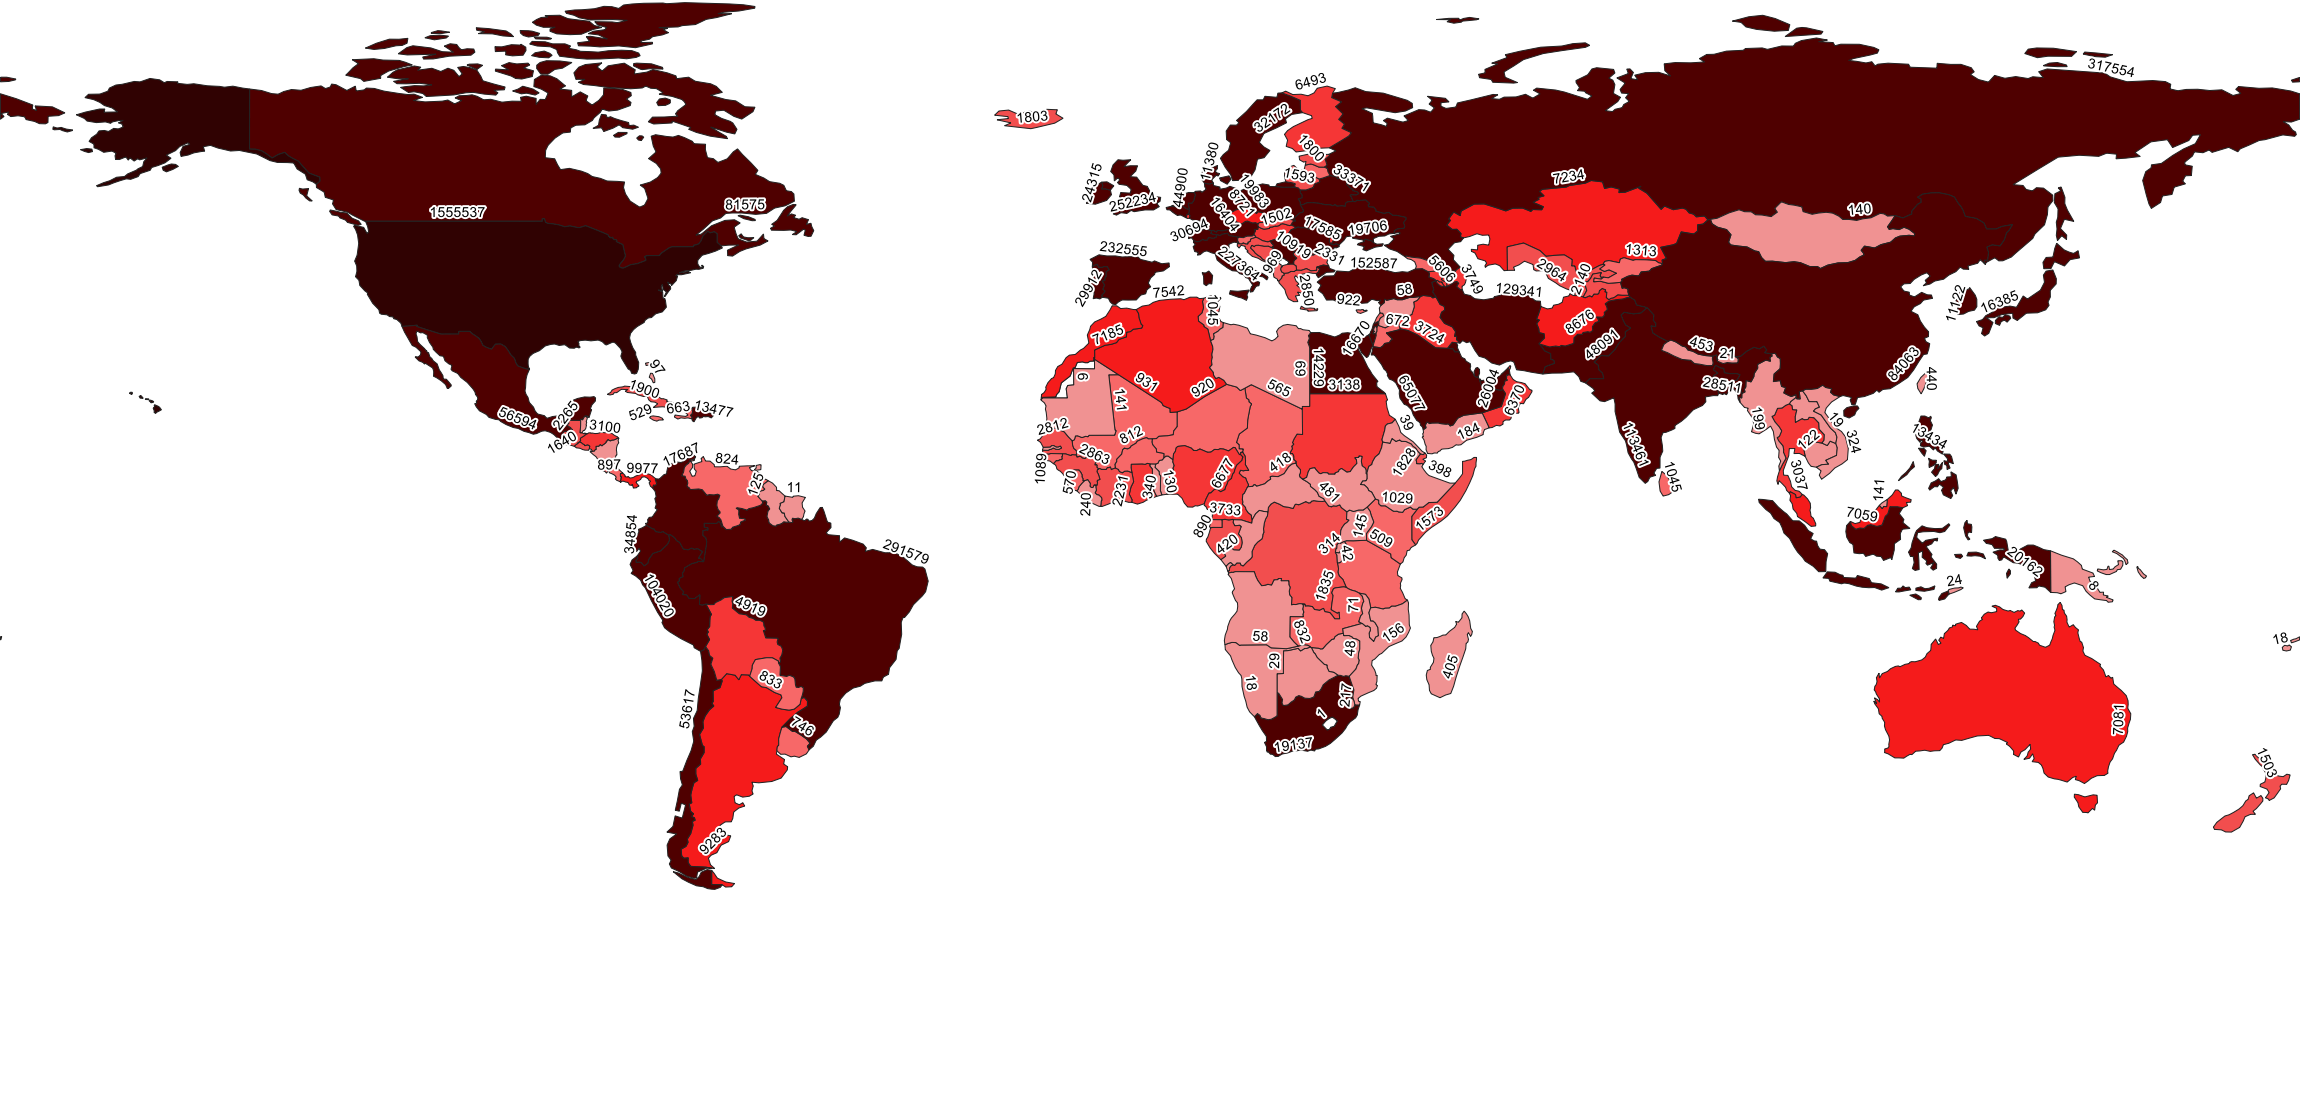

In [35]:
display(HTML("<div style = 'padding: 30px '>"
             "<span style='color: #4f0000; font-size:30px;'> Casos: "  + str(confirmed_total) +"</span>" +
             "</div>")
       )
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Confirmados.jpg',"JPG")
Image( imgbuf.data() )

In [30]:
from qgis.PyQt import QtGui

myVectorLayer = QgsProject.instance().mapLayersByName('Mundo')[0]
targetField = 'Mundo_recovered'
myRangeList = []
myOpacity  = 1
print(myVectorLayer.geometryType())

# Make our first symbol and range...
myMin = 0.0
myMax = 6.0
myLabel = 'Group 1'
myColour = QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 6.0
myMax = 500.0
myLabel = 'Group 2'
myColour = QColor('#CCFFDB')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 500.0
myMax = 1500.0
myLabel = 'Group 3'
myColour = QColor('#93B89E')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 1500.0
myMax = 3000.0
myLabel = 'Group 4'
myColour = QColor('#4CCC72')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 3000.1
myMax = 7000.0
myLabel = 'Group 5'
myColour = QColor('#7FE59E')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

#and another one 
myMin = 7000.1
myMax = 10000.0
myLabel = 'Group 6'
myColour = QColor('#7FFF7F')
mySymbol6 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol6.setColor(myColour)
mySymbol6.setOpacity(myOpacity)
myRange6 = QgsRendererRange(myMin, myMax, mySymbol6, myLabel)
myRangeList.append(myRange6)

#and another one 
myMin = 10000.1
myMax = 1000000.0
myLabel = 'Group 7'
myColour = QColor('#66FF66')
mySymbol7 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol7.setColor(myColour)
mySymbol7.setOpacity(myOpacity)
myRange7 = QgsRendererRange(myMin, myMax, mySymbol7, myLabel)
myRangeList.append(myRange7)

#and another one 
myMin = 1000000.1
myMax = 999999999999.0
myLabel = 'Group 8'
myColour = QColor('#24FF25')
mySymbol8 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol8.setColor(myColour)
mySymbol8.setOpacity(myOpacity)
myRange8 = QgsRendererRange(myMin, myMax, mySymbol8, myLabel)
myRangeList.append(myRange8)


# create the renderer
groupRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
groupRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
groupRenderer.setClassAttribute(targetField)
 
# apply renderer to layer
vlayer.setRenderer(groupRenderer)

# Add Labels ########
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 10))
text_format.setSize(10)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Mundo_recovered"
layer_settings.placement = 2

layer_settings.enabled = True

layer_settings = QgsVectorLayerSimpleLabeling(layer_settings)
vlayer.setLabelsEnabled(True)
vlayer.setLabeling(layer_settings)
vlayer.triggerRepaint()

# add to QGIS interface
QgsProject.instance().addMapLayer(vlayer)

vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

xt = vlayer.extent()
# print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

#for field in vlayer.fields():
#    print(field.name(), field.type())

2
Gerar mapa com 2300 por 1109


C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\ipykernel_launcher.py:106: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


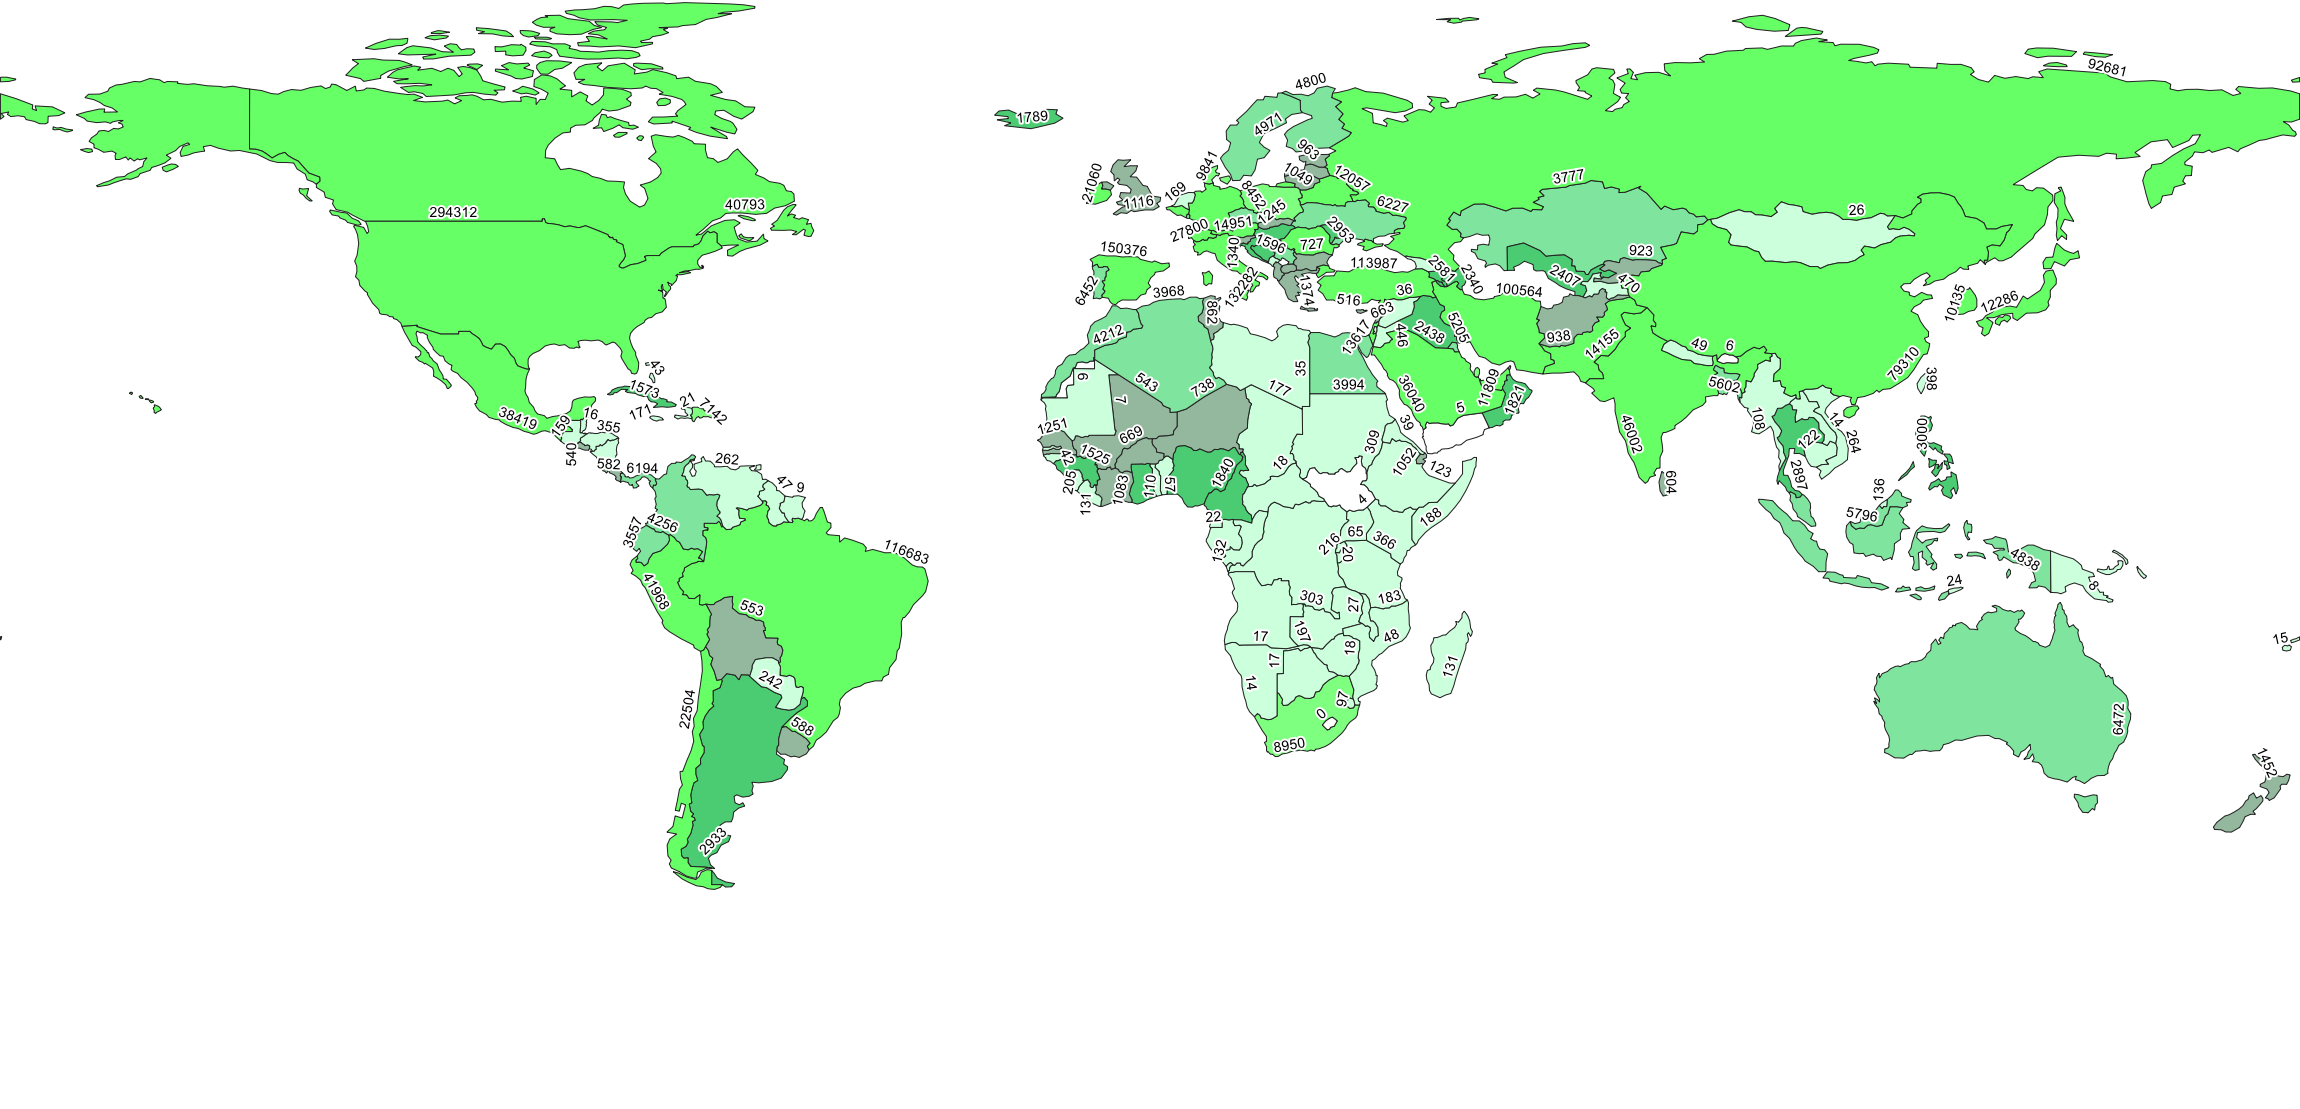

In [31]:
display(HTML("<div style = 'padding: 30px '>"
             "<span style='color: #24FF25; font-size:30px;'> Recuperados: "  + str(recovered_total) +"</span>" +
             "</div>")
       )
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Recuperados.jpg',"JPG")
Image( imgbuf.data() )